In [1]:
import cv2
import imutils
from PIL import Image
import math

In [2]:
img = cv2.imread('./../datasets/images/distance_detection/8.jpeg')
img = imutils.resize(img, width=600)

In [3]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray = cv2.GaussianBlur(gray, (7, 7), 0)

In [4]:
dictionary = cv2.aruco.getPredefinedDictionary(cv2.aruco.DICT_5X5_50)
arucoParams = cv2.aruco.DetectorParameters()
corners = cv2.aruco.detectMarkers(gray, dictionary, parameters=arucoParams)[0]

In [5]:
assert len(corners) > 0, "No ArUco marker detected"

In [6]:
markerCorner = corners[0]

In [7]:
# Aruco Perimeter
aruco_perimeter = cv2.arcLength(markerCorner, True)
# Pixel to cm ratio
# perimeter of the aruco marker is 28 centimeters (7cm x 4).
pixel_per_cm = aruco_perimeter / 28

In [8]:
print("ArUco Perimeter: {}".format(aruco_perimeter))
print("Pixel to cm ratio: {}".format(pixel_per_cm))

ArUco Perimeter: 835.3807220458984
Pixel to cm ratio: 29.835025787353516


# Check the calculated pixel to cm ratio

Width in px: 210.08569680013915
Width in cm: 7.04157919277517
Height in px: 209.11719202399405
Height in cm: 7.009117187109479


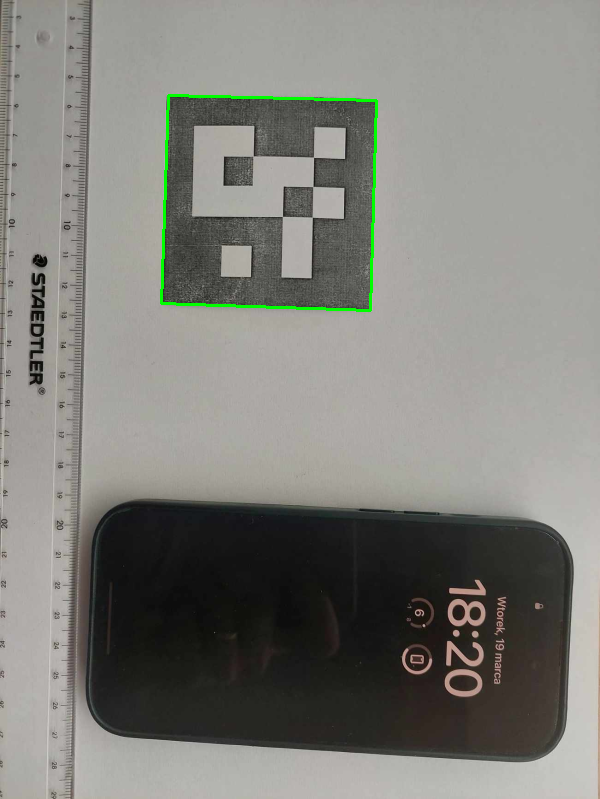

In [9]:
# extract the marker corners (which are always returned in
# top-left, top-right, bottom-right, and bottom-left order)
corners = markerCorner.reshape((4, 2))
(topLeft, topRight, bottomRight, bottomLeft) = corners

# convert each of the (x, y)-coordinate pairs to integers
topLeft = (int(topLeft[0]), int(topLeft[1]))
topRight = (int(topRight[0]), int(topRight[1]))
bottomRight = (int(bottomRight[0]), int(bottomRight[1]))
bottomLeft = (int(bottomLeft[0]), int(bottomLeft[1]))

width = math.dist(topLeft, topRight)
height = math.dist(topRight, bottomRight)

width_in_cm = width / pixel_per_cm
height_in_cm = height / pixel_per_cm

# draw the bounding box of the ArUCo detection
cv2.line(img, topLeft, topRight, (0, 255, 0), 2)
cv2.line(img, topRight, bottomRight, (0, 255, 0), 2)
cv2.line(img, bottomRight, bottomLeft, (0, 255, 0), 2)
cv2.line(img, bottomLeft, topLeft, (0, 255, 0), 2)

print("Width in px: {}".format(width))
print("Width in cm: {}".format(width_in_cm))
print("Height in px: {}".format(height))
print("Height in cm: {}".format(height_in_cm))

# show the output img    
preview = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # Converting BGR to RGB
display(Image.fromarray(preview))